In [71]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import RandomOverSampler

import seaborn as sns

In [21]:
train_df = pd.read_csv('train.csv', header=None, na_values=[' ?'])
test_df = pd.read_csv('test.csv', header=None, na_values=[' ?'])
train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [27]:
columns = [
    "age", "workclass", "fnlwgt", "education",
    "education_num", "marital_status", "occupation", "relationship",
    "race", "sex", "capital_gain","capital_loss", "hours_per_week", "native_country", "income"
]

train_df.columns = columns
test_df.columns = columns

test_df['income'] = test_df['income'].str.replace('.', '', regex=False)
df = pd.concat([train_df, test_df])
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [35]:
# Заполнение пропущенных значений модой (самое частое значение)
for col in df.columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

print(df['income'].value_counts())

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [79]:
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
encoder = LabelEncoder()
df_encoded = df.copy()
for col in categorical_columns:
    df_encoded[col] = encoder.fit_transform(df[col])
df_encoded

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,3,215419,9,13,0,9,1,4,0,0,0,36,38,0
16277,64,3,321403,11,9,6,9,2,2,1,0,0,40,38,0
16278,38,3,374983,9,13,2,9,0,4,1,0,0,50,38,0
16279,44,3,83891,9,13,0,0,3,1,1,5455,0,40,38,0


Before oversampling
income
0    37155
1    11687
Name: count, dtype: int64
After oversampling
income
0    37155
1    37155
Name: count, dtype: int64


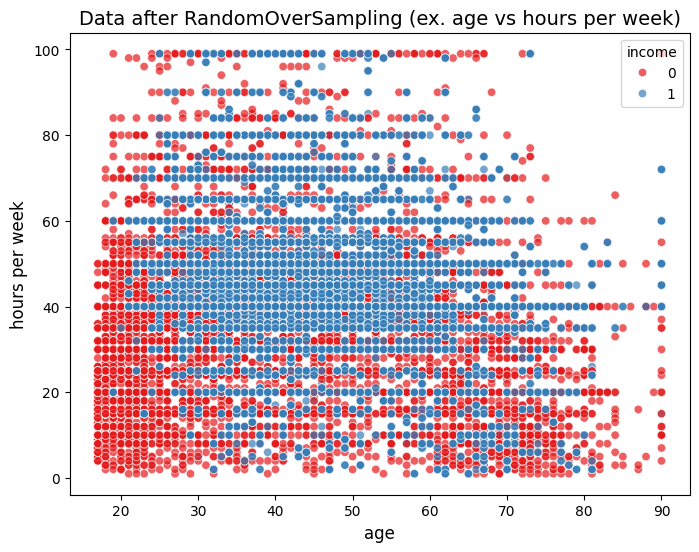

income
0    37155
1    37155
Name: count, dtype: int64

In [81]:
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
X_resampled['income'] = y_resampled
df_balanced = X_resampled.copy()

print('Before oversampling')
print(y.value_counts())
print('After oversampling')
print(y_resampled.value_counts())

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_resampled['age'], 
                y=X_resampled['hours_per_week'], 
                hue=y_resampled, 
                palette='Set1', 
                alpha=0.7)

plt.title('Data after RandomOverSampling (ex. age vs hours per week)', fontsize=14)
plt.xlabel('age', fontsize=12)
plt.ylabel('hours per week', fontsize=12)
plt.legend(title='income', loc='upper right')
plt.show()
df_balanced['income'].value_counts()

In [83]:
X = df_balanced.drop('income', axis=1)
y = df_balanced['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Эксперименты со случайным лесом
results = {
    'n_estimators': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

print("Метрики качества для RandomForestClassifier:")
print("-" * 60)

for n in range(50, 101, 10):
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results['n_estimators'].append(n)
    results['accuracy'].append(acc)
    results['precision'].append(prec)
    results['recall'].append(rec)
    results['f1'].append(f1)

    print(f"n_estimators = {n}")
    print(f"  Accuracy :  {acc:.4f}")
    print(f"  Precision:  {prec:.4f}")
    print(f"  Recall   :  {rec:.4f}")
    print(f"  F1 Score :  {f1:.4f}")
    print("-" * 60)


Метрики качества для RandomForestClassifier:
------------------------------------------------------------
n_estimators = 50
  Accuracy :  0.9352
  Precision:  0.8991
  Recall   :  0.9792
  F1 Score :  0.9374
------------------------------------------------------------
n_estimators = 60
  Accuracy :  0.9345
  Precision:  0.8978
  Recall   :  0.9794
  F1 Score :  0.9368
------------------------------------------------------------
n_estimators = 70
  Accuracy :  0.9348
  Precision:  0.8976
  Recall   :  0.9803
  F1 Score :  0.9371
------------------------------------------------------------
n_estimators = 80
  Accuracy :  0.9360
  Precision:  0.9001
  Recall   :  0.9796
  F1 Score :  0.9382
------------------------------------------------------------
n_estimators = 90
  Accuracy :  0.9358
  Precision:  0.8996
  Recall   :  0.9799
  F1 Score :  0.9380
------------------------------------------------------------
n_estimators = 100
  Accuracy :  0.9357
  Precision:  0.8996
  Recall   :  0.97

In [93]:
def train_decision_tree(X_train, y_train, X_test, y_test, criterion="gini"):
    model = DecisionTreeClassifier(criterion=criterion, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) # точность
    precision = precision_score(y_test, y_pred, pos_label=1) # точность
    recall = recall_score(y_test, y_pred, pos_label=1) # полнота
    f1 = f1_score(y_test, y_pred, pos_label=1) # F1 score

    return accuracy, precision, recall, f1

# Вычисление метрик для дерева решений
accuracy_dt, precision_dt, recall_dt, f1_dt = train_decision_tree(X_train, y_train, X_test, y_test)

print("Метрики для дерева решений:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 score: {f1_dt:.4f}")

Метрики для дерева решений:
Accuracy: 0.9189
Precision: 0.8772
Recall: 0.9724
F1 score: 0.9224


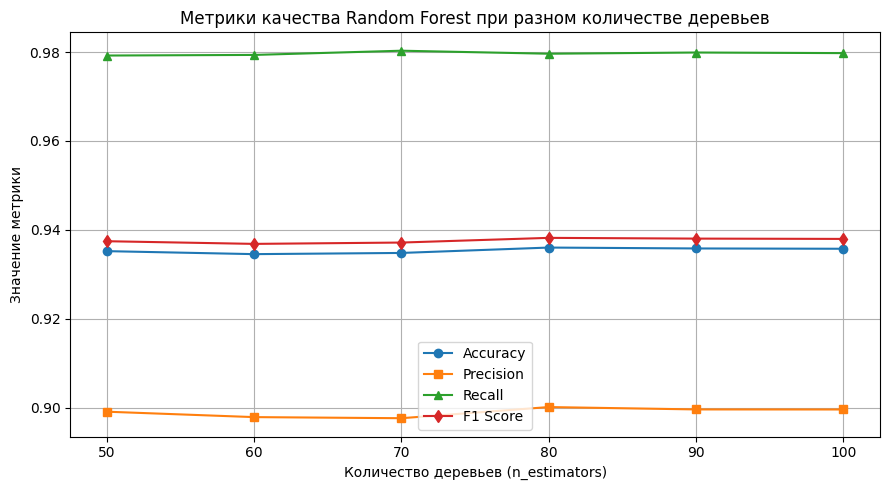

In [89]:
plt.figure(figsize=(9, 5))
plt.plot(results['n_estimators'], results['accuracy'], marker='o', label='Accuracy')
plt.plot(results['n_estimators'], results['precision'], marker='s', label='Precision')
plt.plot(results['n_estimators'], results['recall'], marker='^', label='Recall')
plt.plot(results['n_estimators'], results['f1'], marker='d', label='F1 Score')

plt.title('Метрики качества Random Forest при разном количестве деревьев')
plt.xlabel('Количество деревьев (n_estimators)')
plt.ylabel('Значение метрики')
plt.xticks(results['n_estimators'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()